In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

src = cv2.imread("img/Mandrill.bmp", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("img/Mandrill.bmp")

## 濃淡処理

### 折れ線型

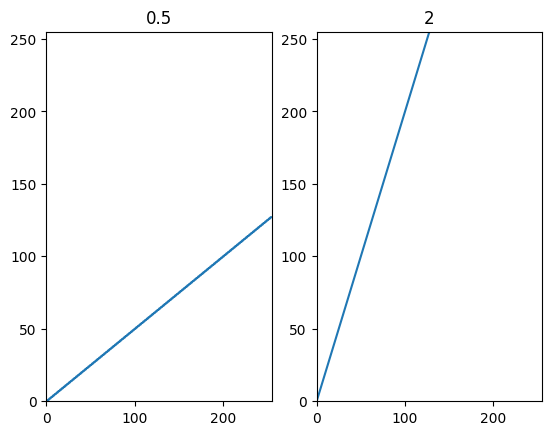

In [8]:
def oresen(k):
    curve = k * np.arange(0, 256)
    curve = curve.clip(0, 255)
    return curve.astype(np.uint8)

cv2.imshow("src", src)

# dst 0.5
curve1 = oresen(0.5)
dst = cv2.LUT(src, curve1)
cv2.imshow("dst 0.5", dst)

# dst 0.5
curve2 = oresen(2)
dst = cv2.LUT(src, curve2)
cv2.imshow("dst 2", dst)

plt.subplot(121)
plt.plot(curve1), plt.title("0.5")
plt.xlim(0, 255), plt.ylim(0, 255)
plt.subplot(122)
plt.plot(curve2), plt.title("2")
plt.xlim(0, 255), plt.ylim(0, 255)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


### コントラスト変更

In [3]:
def oresen2(k):
    curve = k * np.arange(0, 256) + 128 - 128 * k
    curve = curve.clip(0, 255)
    return curve.astype(np.uint8)

# dst 0.5
curve1 = oresen2(0.5)
dst = cv2.LUT(src, curve1)
cv2.imshow("dst 0.5", dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

### ガンマ補正

In [4]:
def gamma_curve(gamma):
    curve = np.arange(0, 256)
    curve = 255 * np.power(curve / 255, 1/gamma)
    return curve.astype(np.uint8)

curve1 = gamma_curve(0.5)
dst = cv2.LUT(src, curve1)
cv2.imshow("gamma 0.5", dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

### ネガポジ反転

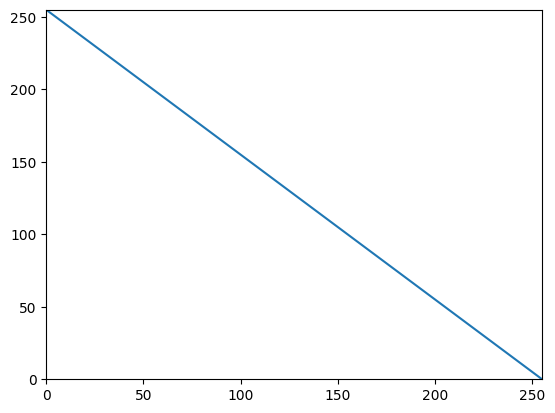

In [9]:
def negaposi():
    curve = 255 - np.arange(0, 256)
    return curve.astype(np.uint8)

curve1 = negaposi()
dst = cv2.LUT(src, curve1)
cv2.imshow("negaposi", dst)

plt.plot(curve1)
plt.xlim(0, 255), plt.ylim(0, 255)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

## 幾何変換

### フリップ

In [2]:
img = cv2.imread("img/Mandrill.bmp")

In [3]:
cv2.imshow("src", img)
dst = cv2.flip(img, 0)
cv2.imshow("dst0", dst)
dst = cv2.flip(img, 1)
cv2.imshow("dst1", dst)
dst = cv2.flip(img, -1)
cv2.imshow("dst-1", dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 画像の回転

In [4]:
img = cv2.imread("img/Parrots.bmp")

height = img.shape[0]
width = img.shape[1]

center = (int(width/2), int(height/2))
trans = cv2.getRotationMatrix2D(center, 30.0, 1.0)
dst = cv2.warpAffine(img, trans, (width, height), flags = cv2.INTER_CUBIC)

cv2.imshow("src", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 射影変換

In [9]:
h, w, c = img.shape
src_pts = np.array([[0, 0], [0, h], [w, h], [w, 0]], dtype=np.float32)

# pattern-0
dst_pts = np.array([[20,10], [10, h-20], [w-20, h-30], [w-40, 30]], dtype=np.float32)
perspective_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst = cv2.warpPerspective(img, perspective_matrix, (w, h))
cv2.imshow("dst1", dst)

# pattern-1
h_margin = h/8
w_margin = w/8
dst_pts = np.array([[w_margin, h_margin], src_pts[1], src_pts[2], [w-w_margin, h_margin]], dtype=np.float32)
perspective_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst = cv2.warpPerspective(img, perspective_matrix, (w, h))
cv2.imshow("dst2", dst)

# pattern-2
h_margin = h/5
w_margin = w/5
dst_pts = np.array([src_pts[0], src_pts[1], [w-w_margin, h-h_margin], [w-w_margin, h_margin]], dtype=np.float32)
perspective_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst = cv2.warpPerspective(img, perspective_matrix, (w, h))
cv2.imshow("dst3", dst)

# pattern-3
h_margin = h/3
w_margin = w/3
dst_pts = np.array([[w_margin, h_margin], src_pts[1], [w-w_margin, h-h_margin], src_pts[3]], dtype=np.float32)
perspective_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
dst = cv2.warpPerspective(img, perspective_matrix, (w, h))
cv2.imshow("dst4", dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

### ヒストグラム

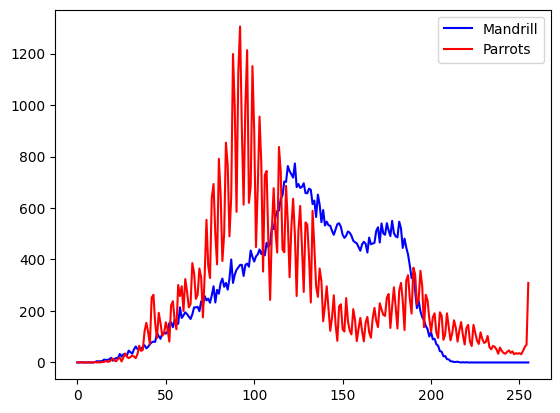

In [11]:
img1 = cv2.imread("img/Mandrill.bmp", 0)
img2 = cv2.imread("img/Parrots.bmp", 0)

hist_img1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist_img2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

plt.plot(hist_img1, color='b', label='Mandrill')
plt.plot(hist_img2, color='r', label='Parrots')

plt.legend()
plt.show()

### カラー画像のヒストグラム

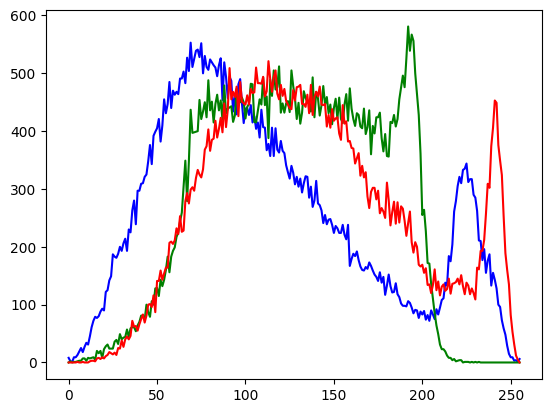

In [12]:
img1 = cv2.imread("img/Mandrill.bmp")

color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img1], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.show()

### 均一化

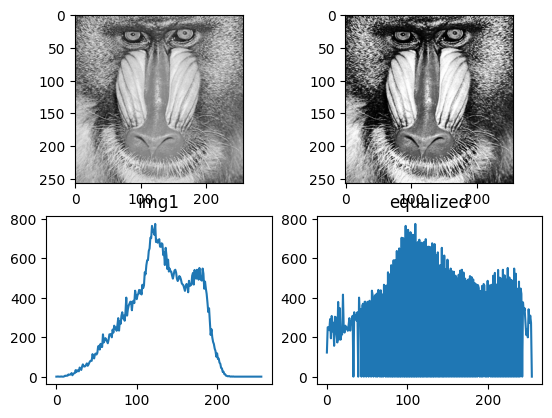

In [14]:
img1 = cv2.imread("img/Mandrill.bmp", 0)

hist_img1 = cv2.calcHist([img1], [0], None, [256], [0, 255])
equalized = cv2.equalizeHist(img1)
hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 255])

plt.subplot(221)
plt.imshow(img1, 'gray')
plt.subplot(222)
plt.imshow(equalized, 'gray')
plt.subplot(223)
plt.plot(hist_img1), plt.title("img1")
plt.subplot(224)
plt.plot(hist_equalized)
plt.title("equalized")
plt.show()

## マスク処理

### AND・OR演算

In [16]:
img = cv2.imread("img/Mandrill.bmp")
cv2.imshow("src", img)

height, width, channel = img.shape
mask = np.zeros((height, width, channel), np.uint8)
cv2.rectangle(mask, (0, 50), (85, height), (255, 255, 255), thickness=-1)
cv2.imshow("mask", mask)

dst1 = cv2.bitwise_and(img, mask)
cv2.imshow("AND", dst1)

dst2 = cv2.bitwise_or(img, mask)
cv2.imshow("OR", dst2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 画像の連結

### 水平方向

In [3]:
flip_img = cv2.flip(img, 1)
hconcat_img = cv2.hconcat([img, flip_img])
cv2.imshow("flip", flip_img)
cv2.imshow("hconcat", hconcat_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 垂直方向

In [4]:
vconcat = cv2.vconcat([img, flip_img])
cv2.imshow("vconcat", vconcat)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 二値化

### グラデーション

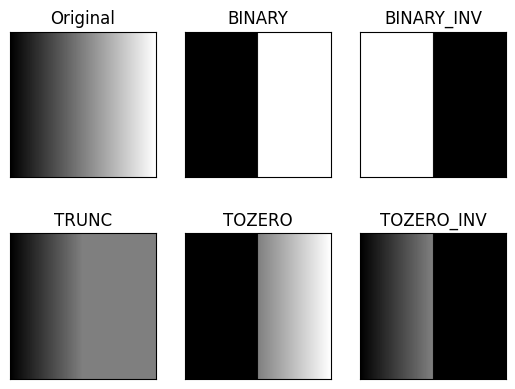

In [9]:
img = np.tile(np.arange(0, 256, 1, dtype=np.uint8), (256, 1)).reshape(256, 256)

res,th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
res,th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
res,th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
res,th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
res,th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

### 閾値処理

In [11]:
img = cv2.imread("img/Mandrill.bmp")
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, dst_color = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
ret, dst_gray = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("src", img)
cv2.imshow("dst_color", dst_color)
cv2.imshow("dst_gray", dst_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 大津の２値化

In [12]:
ret, dst_100 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
ret, dst_OTSU = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(ret)
cv2.imshow("src", img)
cv2.imshow("dst_100", dst_100)
cv2.imshow("dst_OTSU", dst_OTSU)

cv2.waitKey(0)
cv2.destroyAllWindows()

128.0


### 適応的二値化

In [14]:
img = cv2.imread("img/Mandrill.bmp", 0)
ret, dst_OTSU = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

dst1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 5)
dst2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)

cv2.imshow("src", img)
cv2.imshow("dst_OTSU", dst_OTSU)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey(0)
cv2.destroyAllWindows()